<a href="https://colab.research.google.com/github/razim-manzoor/Capstone_Google_Advanced/blob/main/Predictive_Employee_Retention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Employee Retention Analysis for Salifort Motors


> predict employees likely to quit, it might be possible to identify factors that contribute to their leaving.

## Imports


In [63]:
# Importing operational packages
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Importing ensemble model
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Necessary packages importing for evaluation and other tasks
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# To save the model
import pickle

In [64]:
# Importing the data
df0 = pd.read_csv('/content/drive/MyDrive/LTAiDs/Datas/HR_capstone_dataset.csv')
pd.set_option('display.max_columns', None)

In [65]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

In [66]:
# Getting overall information about the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [67]:
# Getting some descriptive stats
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [68]:
# Renaming the columns
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [69]:
# Renaming the columns contd.
df0 = df0.rename(columns={'Work_accident':'work_accident',
                          'time_spend_company':'tenure',
                          'average_montly_hours':'average_monthly_hours',
                          'Department':'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [70]:
# Checking for missing values
df0.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [71]:
# Checking for duplicates
df0.duplicated().sum()

3008

In [72]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [73]:
# Dropping the duplicates and saving to a new dataframe
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


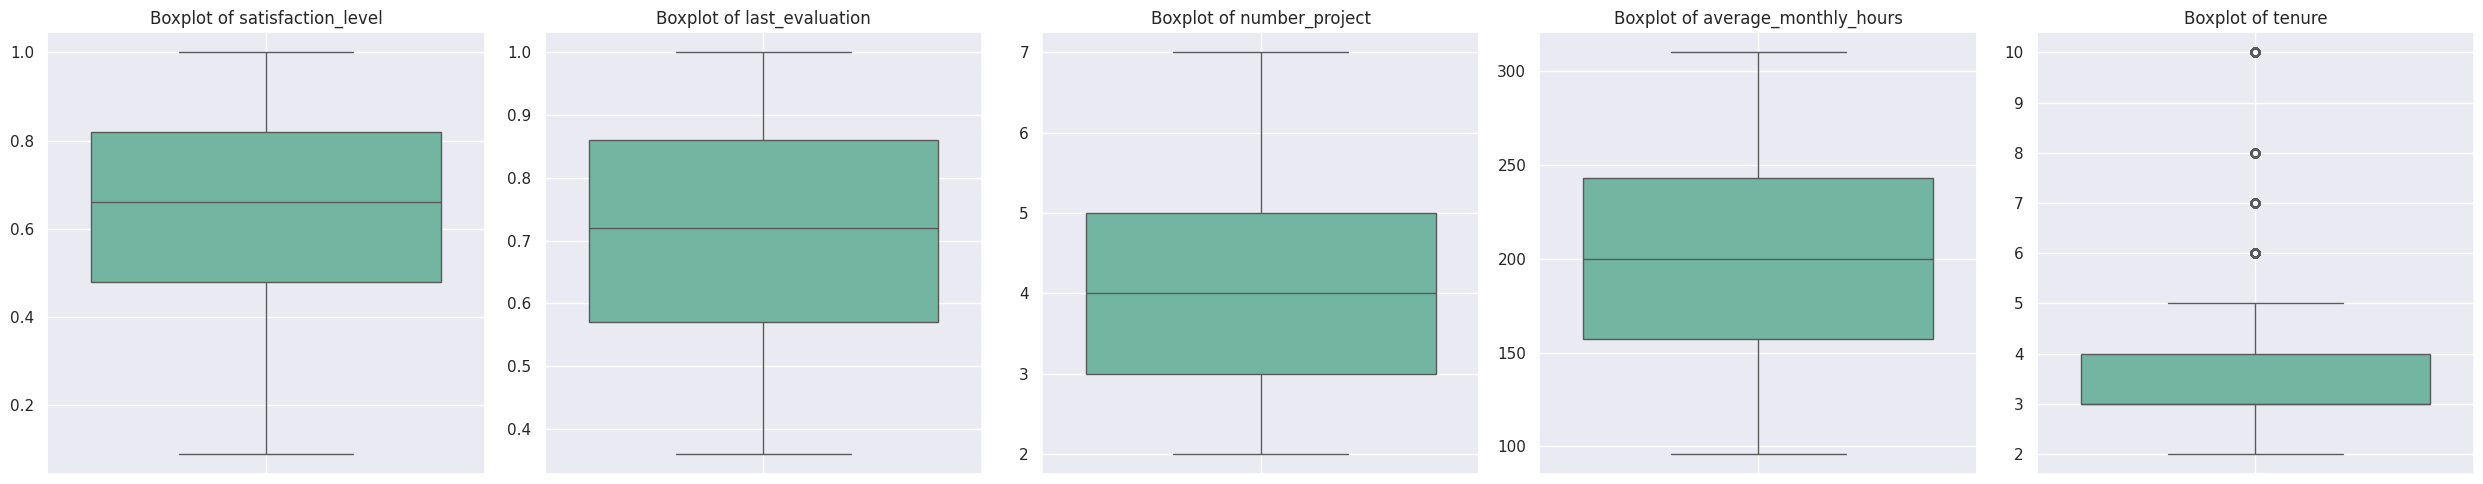

In [74]:
# check for outliers
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
           'average_monthly_hours', 'tenure']

sns.set(style="darkgrid", palette="Set2")
num_columns = len(columns)

fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 5))

for i, column in enumerate(columns):
    sns.boxplot(data=df1[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [75]:
# More info for outliers in tenure column
percentile25, percentile75 = df1['tenure'].quantile([0.25, 0.75])
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

num_outliers = len(outliers)
print("Number of outlier rows in `tenure`:", num_outliers)

Number of outlier rows in `tenure`: 824


In [76]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
# people who left vs. stayed
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


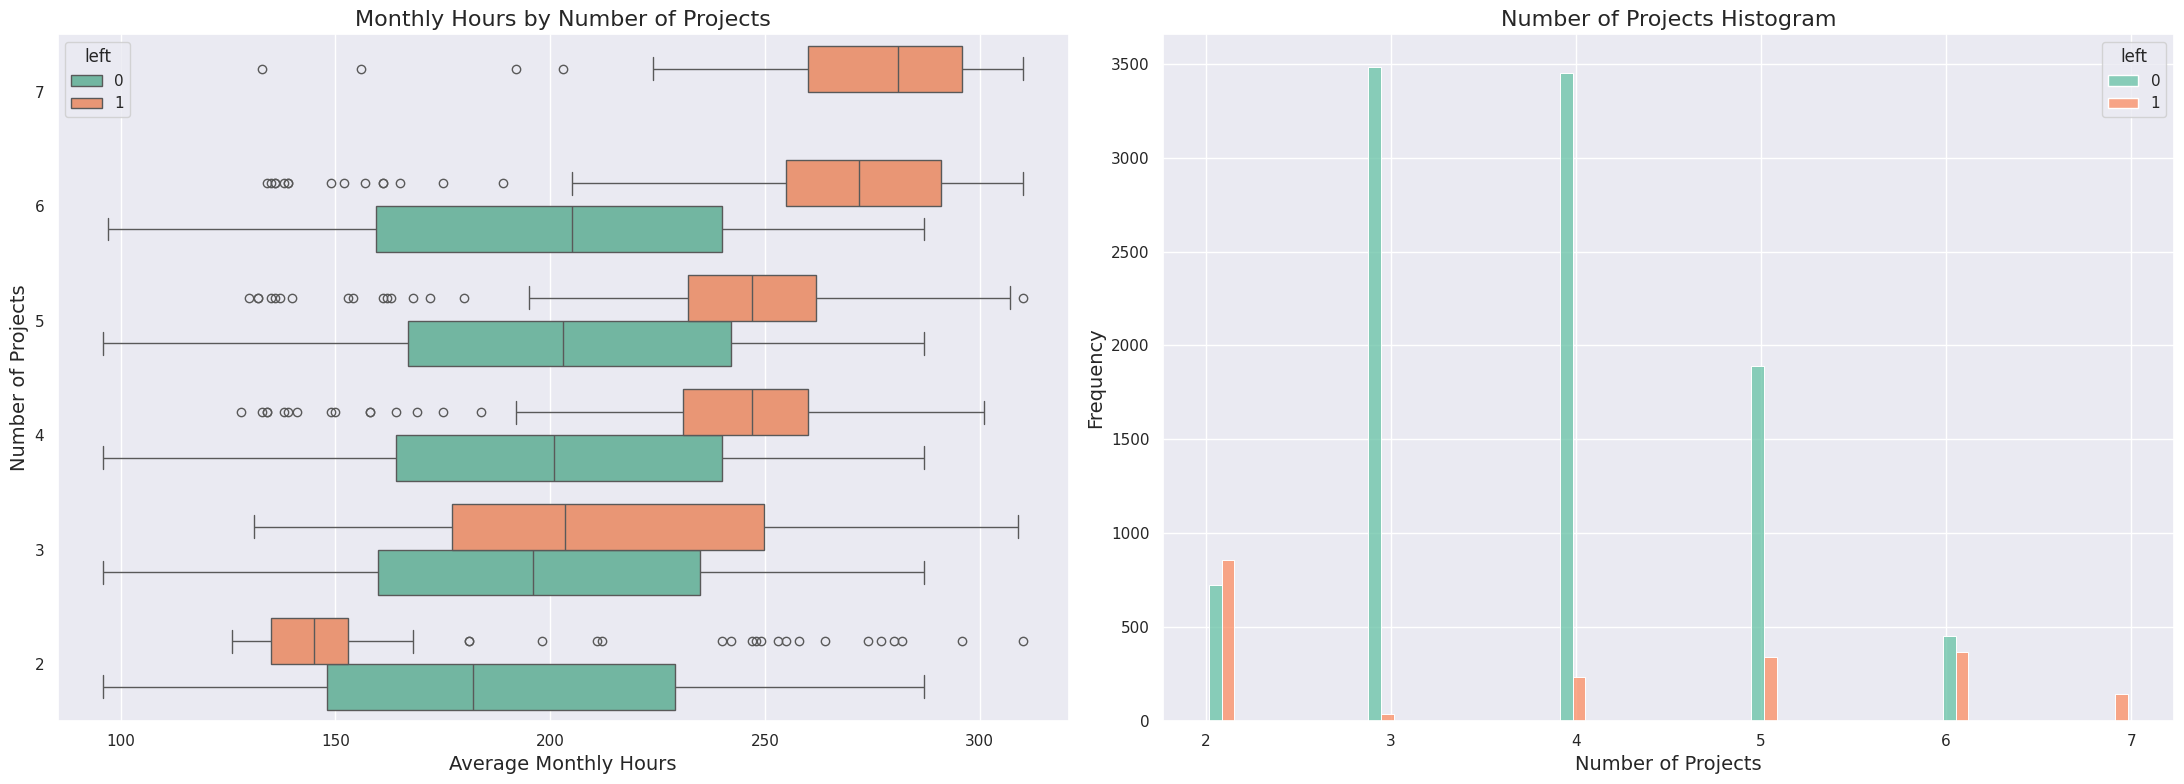

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# distributions of average monthly hours for number_project(stayed vs left)
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left',
            orient="h", ax=ax[0], palette='Set2')
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=16)
ax[0].set_xlabel('Average Monthly Hours', fontsize=14)
ax[0].set_ylabel('Number of Projects', fontsize=14)

# distribution of number of project(left vs stayed)
sns.histplot(data=df1, x='number_project', hue='left',
             multiple='dodge', shrink=0.8, ax=ax[1], palette='Set2')
ax[1].set_title('Number of Projects Histogram', fontsize=16)
ax[1].set_xlabel('Number of Projects', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

In [79]:
# Count of who left who had a project of 7
df1[df1['number_project']==7]['left'].value_counts()

,count
left,
1,145


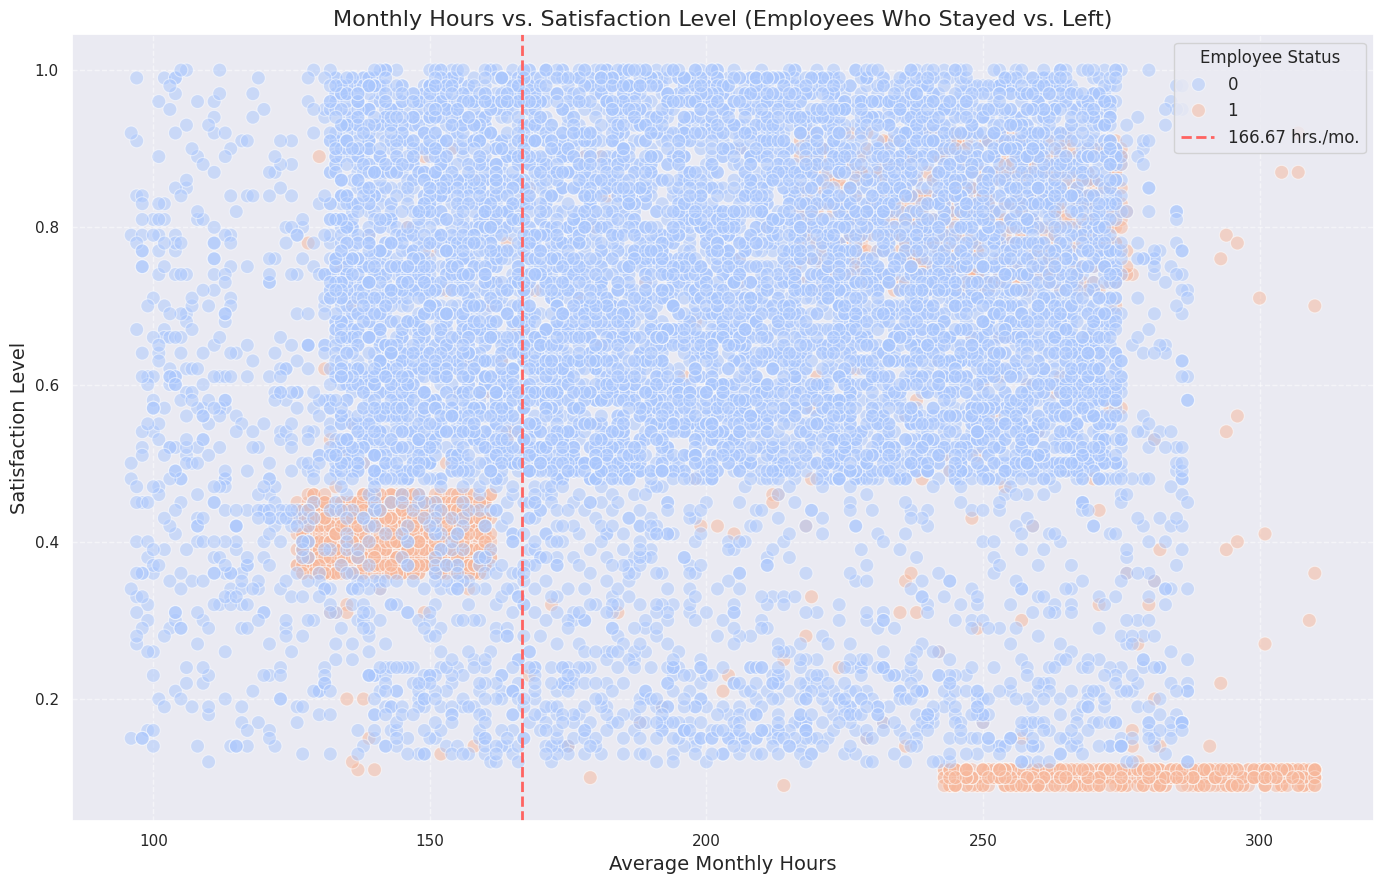

In [80]:
# Monthly hours vs Satisfaction level
plt.figure(figsize=(14, 9))
sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='satisfaction_level',
                hue='left',
                palette='coolwarm',
                alpha=0.5,
                edgecolor='w',
                s=100)

plt.axvline(x=166.67, color='#ff6361', linestyle='--', linewidth=2, label='166.67 hrs./mo.')

plt.title('Monthly Hours vs. Satisfaction Level (Employees Who Stayed vs. Left)', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=14)
plt.ylabel('Satisfaction Level', fontsize=14)

plt.legend(title='Employee Status', loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

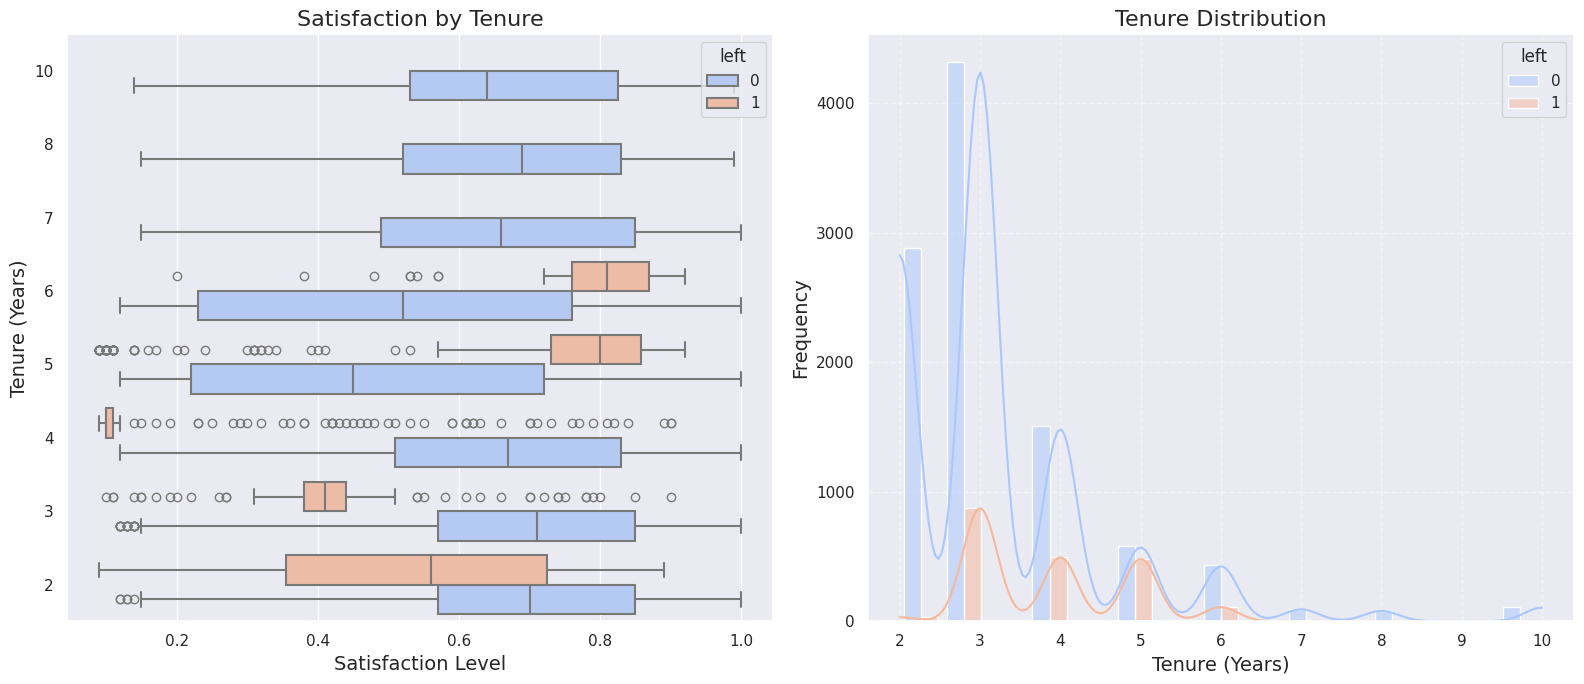

In [81]:
# distributions of satisfaction level by tenure (stayed vs left)
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0], palette='coolwarm', linewidth=1.5)
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize=16)
ax[0].set_xlabel('Satisfaction Level', fontsize=14)
ax[0].set_ylabel('Tenure (Years)', fontsize=14)

sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=0.8, ax=ax[1], palette='coolwarm', bins=15, kde=True)
ax[1].set_title('Tenure Distribution', fontsize=16)
ax[1].set_xlabel('Tenure (Years)', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [82]:
# mean and median satisfaction scores of employees who left and stayed
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


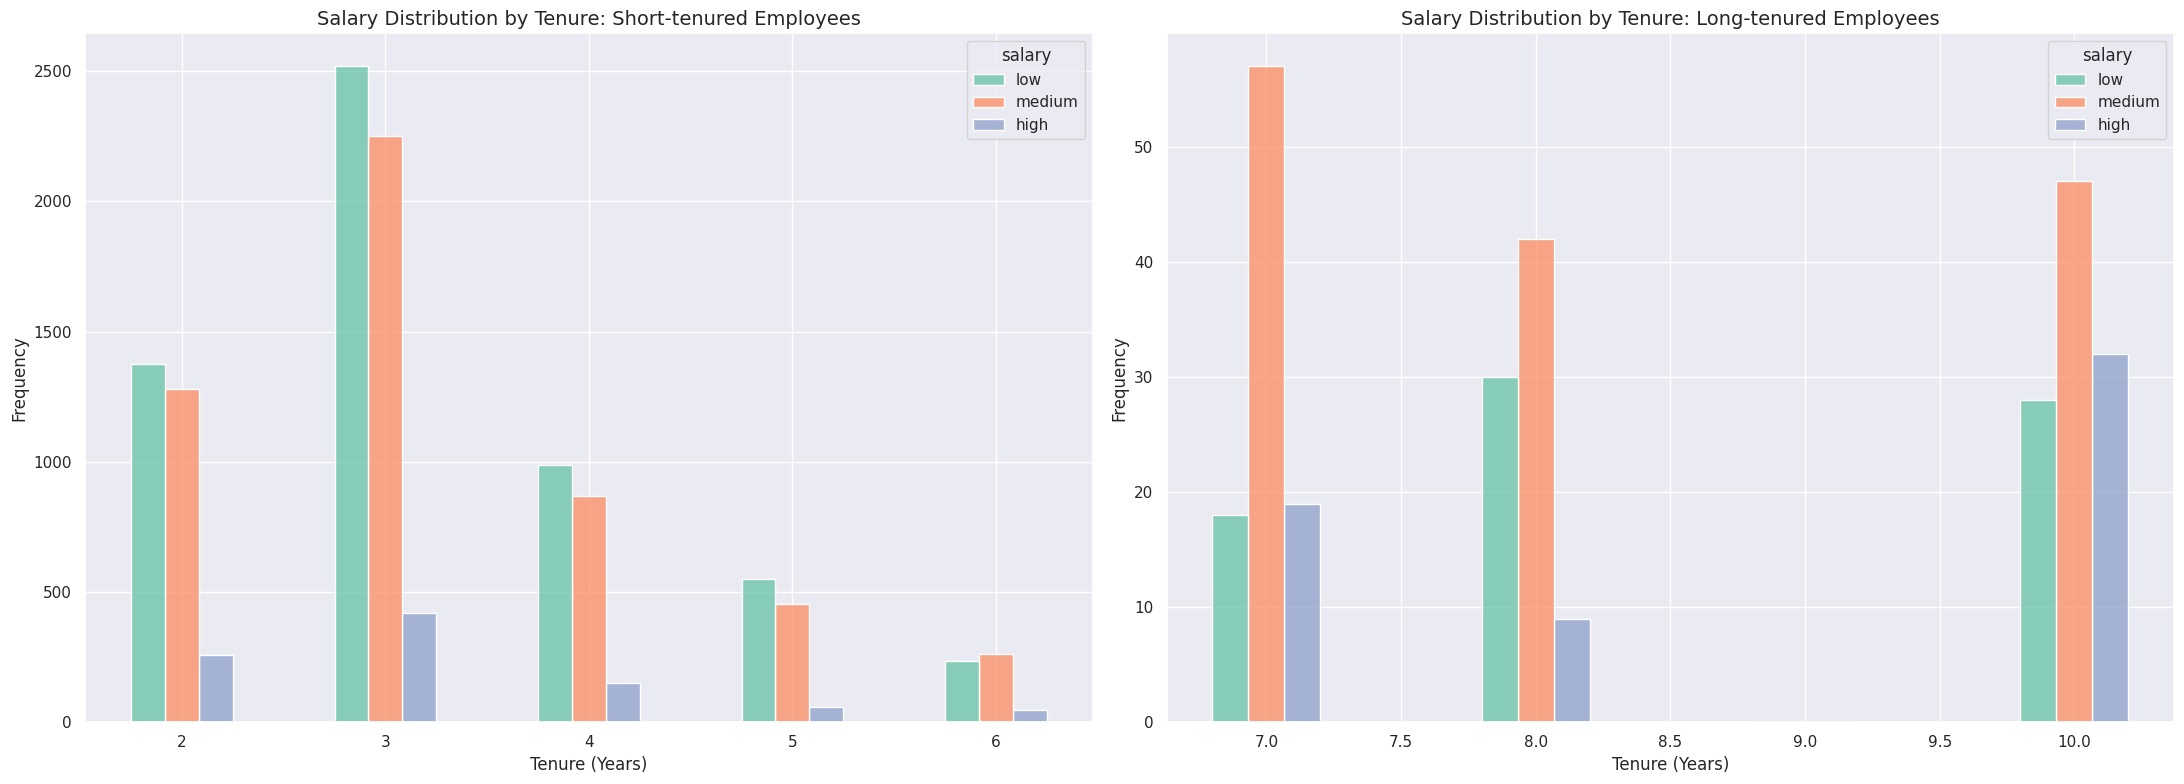

In [83]:
# Salary distribution by short term and long term
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

hist_params = {
    'hue_order': ['low', 'medium', 'high'],
    'multiple': 'dodge',
    'shrink': 0.5,
    'discrete': 1
}

sns.histplot(data=tenure_short, x='tenure', hue='salary', ax=ax[0], **hist_params)
ax[0].set_title('Salary Distribution by Tenure: Short-tenured Employees', fontsize=14)
ax[0].set_xlabel('Tenure (Years)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

hist_params['shrink'] = 0.4
sns.histplot(data=tenure_long, x='tenure', hue='salary', ax=ax[1], **hist_params)
ax[1].set_title('Salary Distribution by Tenure: Long-tenured Employees', fontsize=14)
ax[1].set_xlabel('Tenure (Years)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

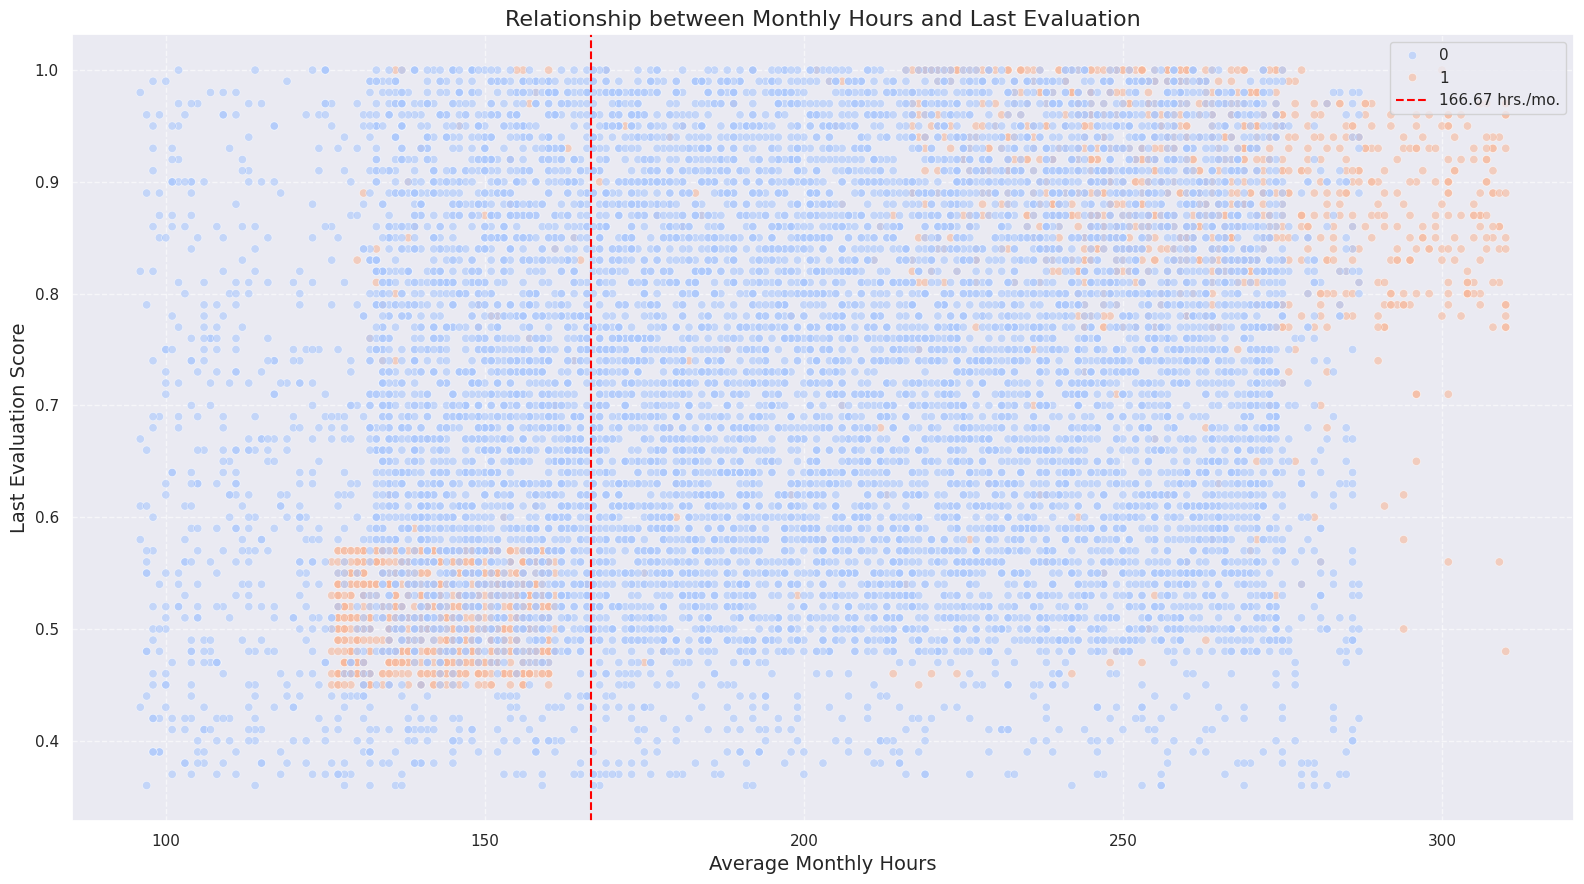

In [84]:
# relationship between Average monthly hours and last evaluation
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',
                hue='left', palette='coolwarm', alpha=0.6)

plt.axvline(x=166.67, color='red', linestyle='--', label='166.67 hrs./mo.')
plt.legend(loc='upper right')
plt.title('Relationship between Monthly Hours and Last Evaluation', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=14)
plt.ylabel('Last Evaluation Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

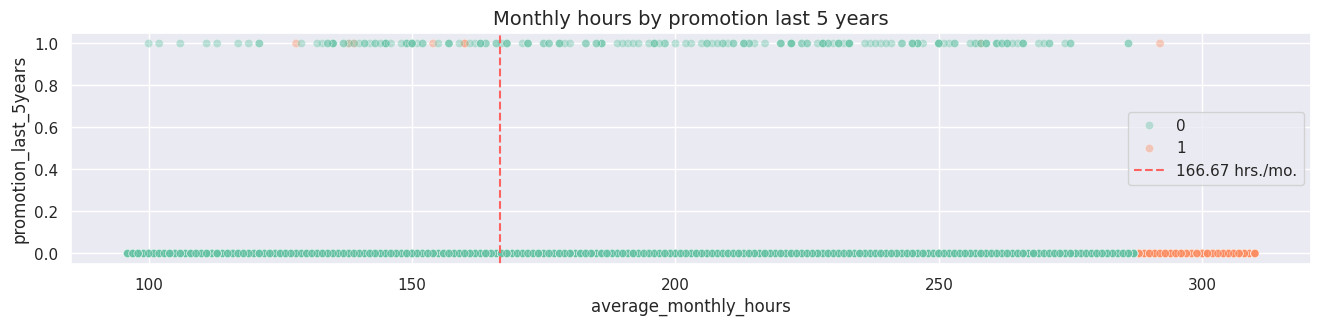

In [85]:
# relationship between Average monthly hours and promotion last 5 years
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--', label='166.67 hrs./mo.')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [86]:
# Display counts for each department
df1["department"].value_counts()

,count
department,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


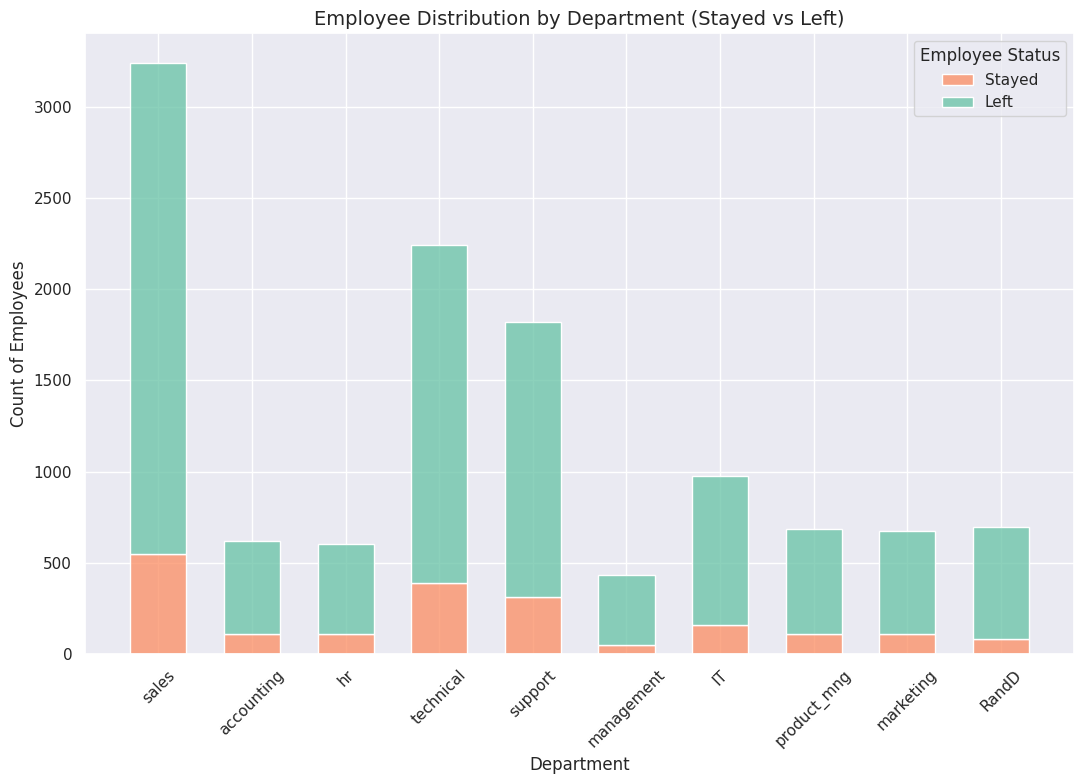

In [87]:
# histogram for department distribution by employee status (left vs. stayed)
plt.figure(figsize=(11, 8))

sns.histplot(data=df1, x='department', hue='left', discrete=True,
             hue_order=[0, 1], multiple='stack', shrink=0.6, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.title('Employee Distribution by Department (Stayed vs Left)', fontsize=14)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])

plt.tight_layout()
plt.show()

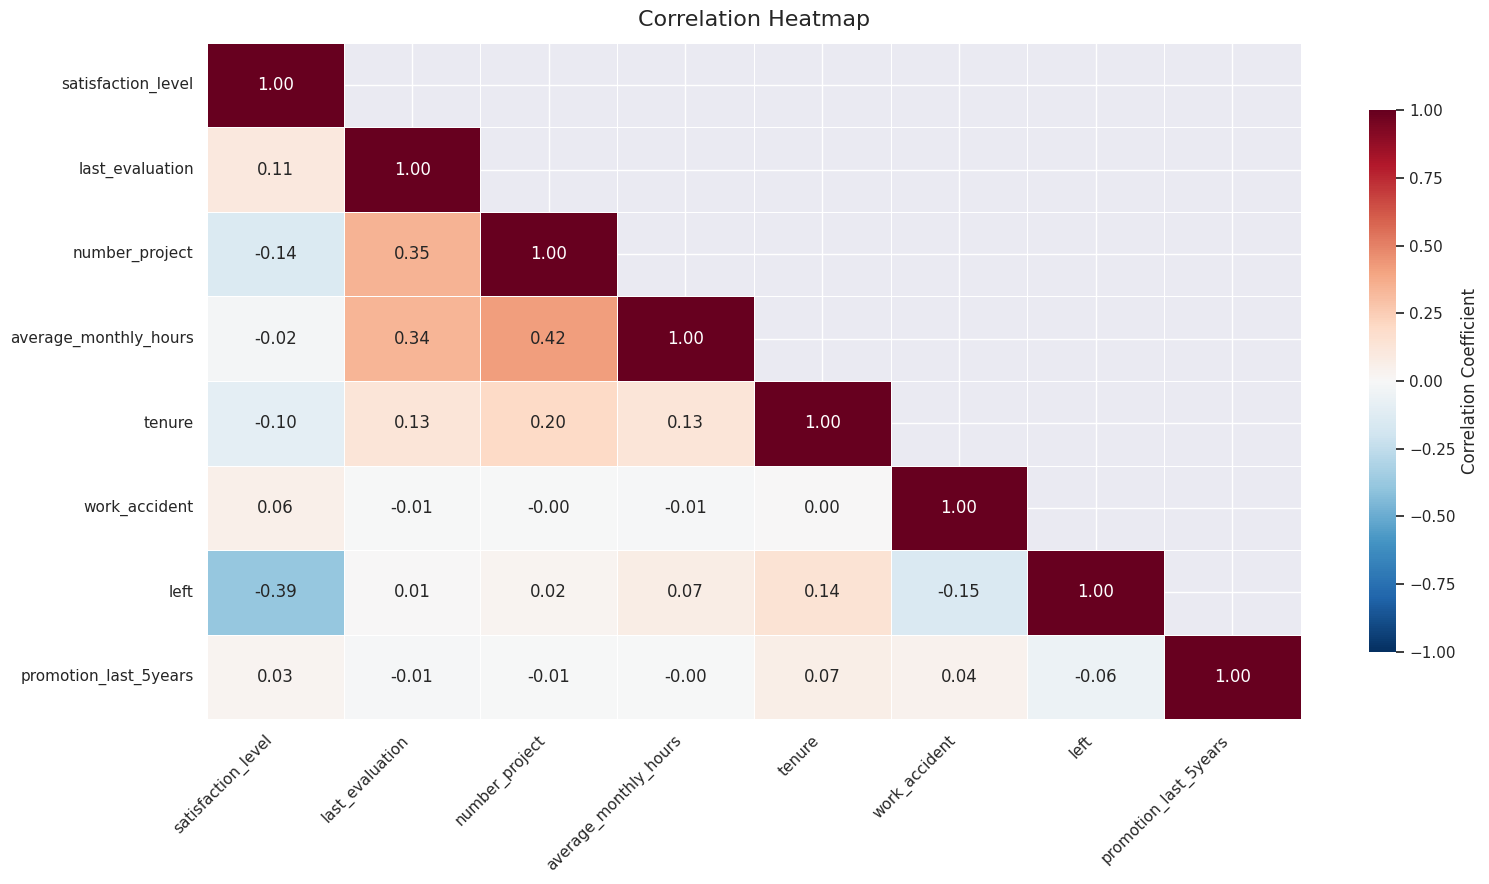

In [88]:
# Correlation matrix
numeric_df = df0.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr_matrix,
                      vmin=-1, vmax=1,
                      annot=True, fmt='.2f',
                      cmap='RdBu_r',
                      annot_kws={'size': 12},
                      mask=mask,
                      cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
                      linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

## Model Building

In [89]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder

df = df1.copy()
encoder = LabelEncoder()
df['salary'] = encoder.fit_transform(df['salary'])

df = pd.get_dummies(df, columns=['department'], dtype=int)

In [90]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


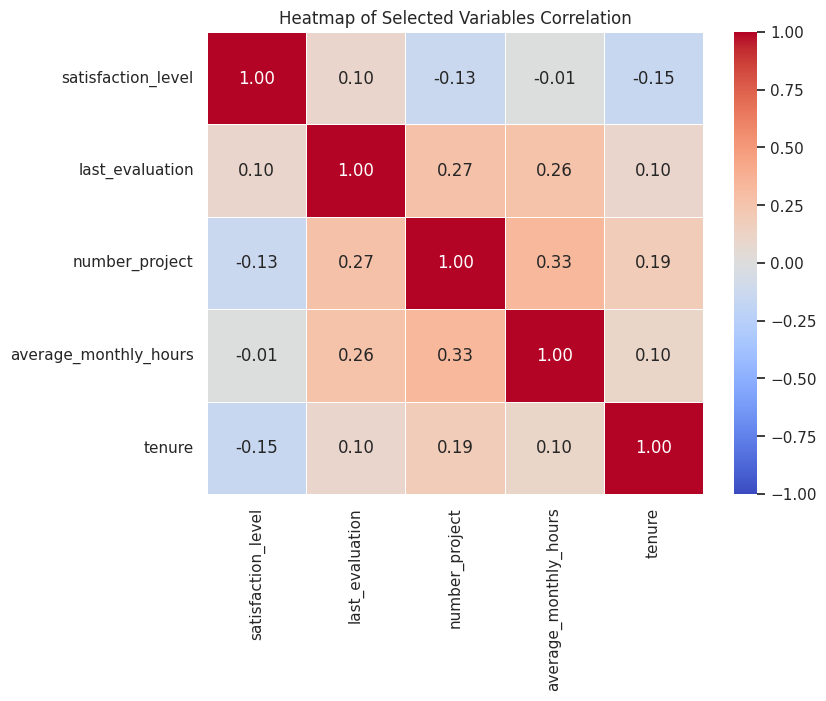

In [91]:
plt.figure(figsize=(8, 6))

selected_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
corr_matrix = df[selected_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)

plt.title('Heatmap of Selected Variables Correlation')
plt.show()

In [92]:
df = df[(df['tenure'] >= lower_limit) & (df['tenure'] <= upper_limit)]

In [93]:
# Isolating features and target
x = df.drop('left', axis=1)
y = df['left']

In [94]:
# Splitting the data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    stratify=y, random_state=42)

Training Logistic Regression without hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


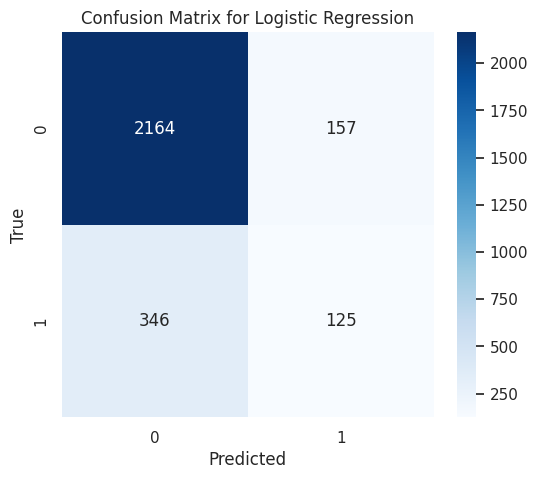

--------------------------------------------------
Training Decision Tree without hyperparameter tuning...


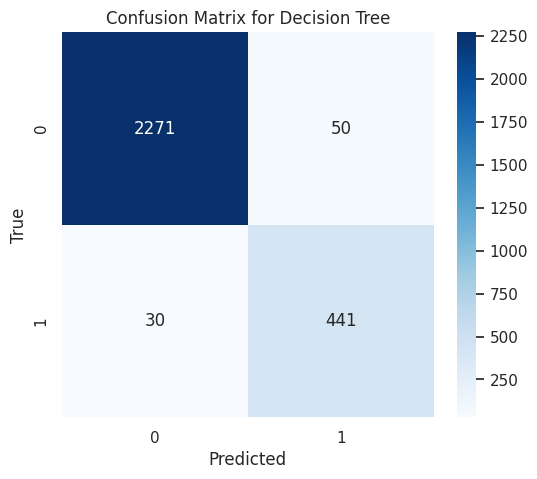

--------------------------------------------------
Training Random Forest without hyperparameter tuning...


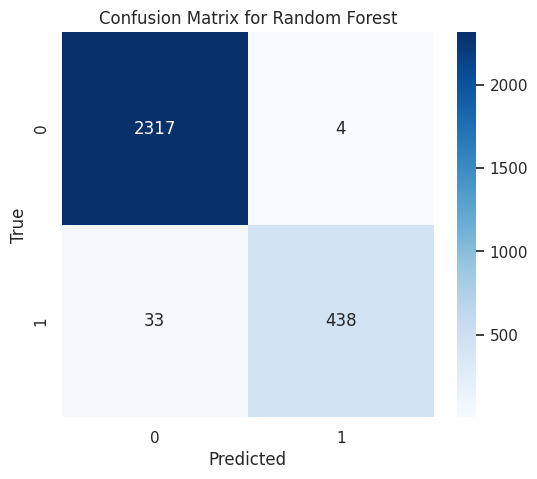

--------------------------------------------------
Training SVM without hyperparameter tuning...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


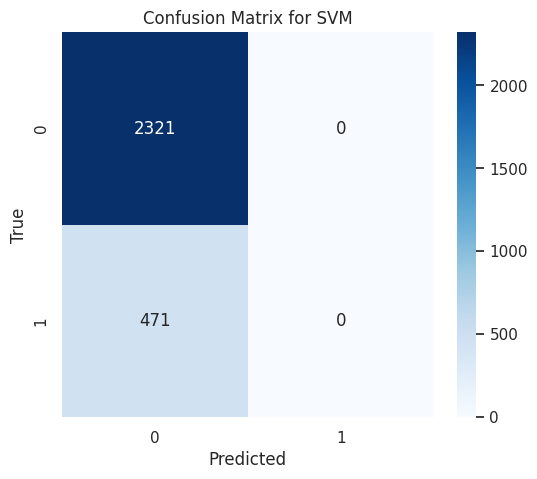

--------------------------------------------------
Training Naive Bayes without hyperparameter tuning...


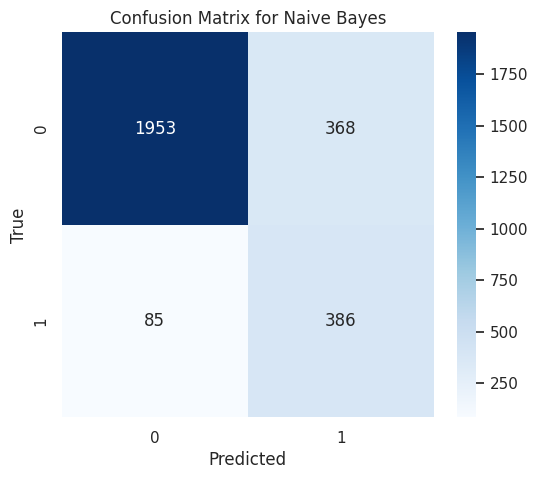

--------------------------------------------------
Training KNN without hyperparameter tuning...


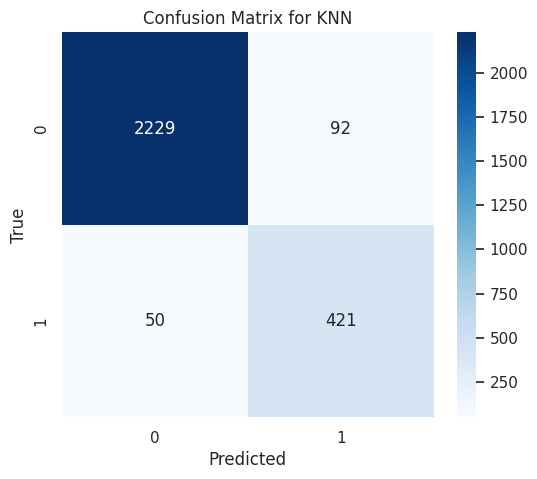

--------------------------------------------------


In [ ]:
# models without hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store evaluation metrics for each model
model_results = []

for model_name, model in models.items():
    print(f"Training {model_name} without hyperparameter tuning...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    precision = class_report['accuracy']
    recall = class_report['macro avg']['recall']
    score = class_report['macro avg']['f1-score']

    # Store the results for each model in the dictionary
    model_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': score,
        'Confusion Matrix': cm
    })

    # Plotting the confusion matrix for each model
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("-" * 50)

# Convert the results dictionary into a pandas DataFrame
results_df = pd.DataFrame(model_results)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.819842,0.819842,0.598875,0.613943,"[[2164, 157], [346, 125]]"
1,Decision Tree,0.971347,0.971347,0.957382,0.949766,"[[2271, 50], [30, 441]]"
2,Random Forest,0.986748,0.986748,0.964106,0.975777,"[[2317, 4], [33, 438]]"
3,SVM,0.831304,0.831304,0.500000,0.453941,"[[2321, 0], [471, 0]]"
4,Naive Bayes,0.837751,0.837751,0.830490,0.763141,"[[1953, 368], [85, 386]]"
5,KNN,0.949140,0.949140,0.927102,0.912411,"[[2229, 92], [50, 421]]"


Tuning hyperparameters for Logistic Regression...
Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


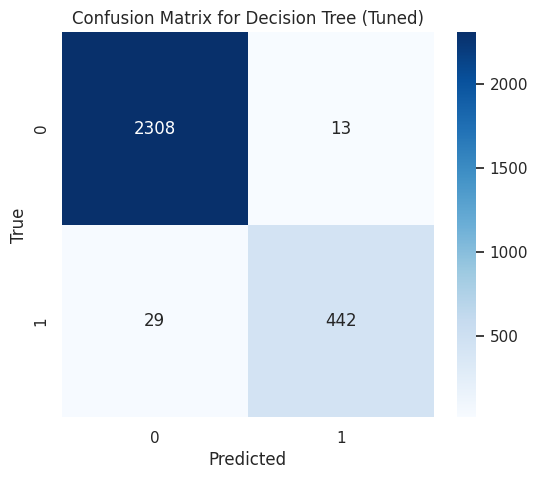

Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


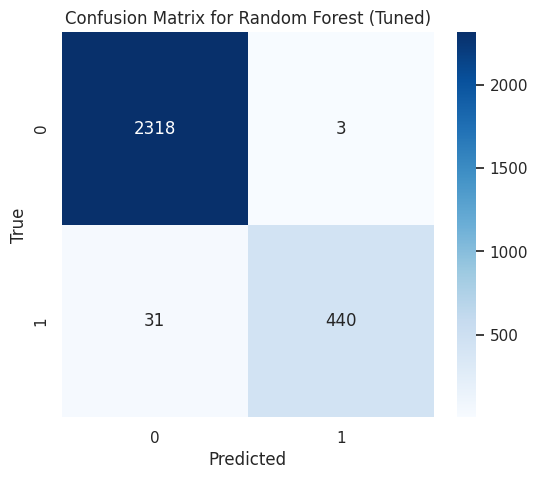

Tuning hyperparameters for SVM...
Tuning hyperparameters for Naive Bayes...
Tuning hyperparameters for KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


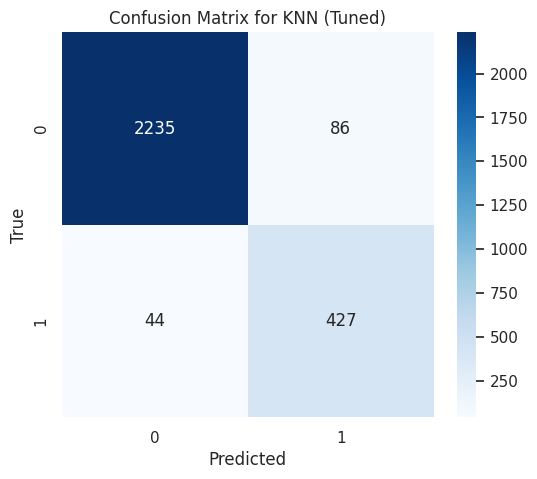

In [ ]:
# Hyperparameter tuning
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

best_models = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    if model_name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                                   cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(x_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")

        y_pred_best = grid_search.best_estimator_.predict(x_test)

        # Evaluation metrics
        accuracy_best = accuracy_score(y_test, y_pred_best)
        precision_best = precision_score(y_test, y_pred_best)
        recall_best = recall_score(y_test, y_pred_best)
        f1_best = f1_score(y_test, y_pred_best)
        cm_best = confusion_matrix(y_test, y_pred_best)

        model_results.append({
            'Model': f"{model_name} (Tuned)",
            'Accuracy': accuracy_best,
            'Precision': precision_best,
            'Recall': recall_best,
            'F1-Score': f1_best,
            'Confusion Matrix': cm_best
        })

        # confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm_best, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f'Confusion Matrix for {model_name} (Tuned)')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Convert the results into a DataFrame
results_tuned_df = pd.DataFrame(model_results)

In [ ]:
results_tuned_df

,Model,Accuracy,Precision,Recall,F1-Score,Confusion Matrix
0,Logistic Regression,0.819842,0.819842,0.598875,0.613943,"[[2164, 157], [346, 125]]"
1,Decision Tree,0.971347,0.971347,0.957382,0.949766,"[[2271, 50], [30, 441]]"
2,Random Forest,0.986748,0.986748,0.964106,0.975777,"[[2317, 4], [33, 438]]"
3,SVM,0.831304,0.831304,0.500000,0.453941,"[[2321, 0], [471, 0]]"
4,Naive Bayes,0.837751,0.837751,0.830490,0.763141,"[[1953, 368], [85, 386]]"
5,KNN,0.949140,0.949140,0.927102,0.912411,"[[2229, 92], [50, 421]]"
6,Logistic Regression (Tuned),0.827364,0.076923,0.002123,0.004132,"[[2309, 12], [470, 1]]"
7,Decision Tree (Tuned),0.985315,0.975664,0.936306,0.955580,"[[2310, 11], [30, 441]]"
8,Random Forest (Tuned),0.987464,0.993213,0.932059,0.961665,"[[2318, 3], [32, 439]]"
9,Decision Tree (Tuned),0.984957,0.971429,0.938429,0.954644,"[[2308, 13], [29, 442]]"


### Random Forest and Decision Tree Building


In [157]:
# Random Forest
best_params = {
    'bootstrap': False,
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 500,
    'random_state': 42
}

In [158]:
model = RandomForestClassifier(**best_params)

model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [159]:
y_pred = model.predict(x_test)

In [160]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

In [161]:
results = {
    'Model': 'Random Forest (Best Hyperparameters)',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': score,
}
results_df = pd.DataFrame([results])

In [162]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Best Hyperparameters),0.987464,0.993213,0.932059,0.961665


In [163]:
# Decision Trees
best_params1 = {
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'random_state': 42
}

In [164]:
model1 = DecisionTreeClassifier(**best_params1)

model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [165]:
y_pred1 = model1.predict(x_test)

In [166]:
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
score1 = f1_score(y_test, y_pred1)

In [167]:
results = {
    'Model': 'Decision Trees (Best Hyperparameters)',
    'Accuracy': accuracy1,
    'Precision': precision1,
    'Recall': recall1,
    'F1-Score': score1,
}
results_df1 = pd.DataFrame([results])

In [168]:
results_combined = pd.concat([results_df, results_df1], ignore_index=True)
results_combined

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Best Hyperparameters),0.987464,0.993213,0.932059,0.961665
1,Decision Trees (Best Hyperparameters),0.985315,0.973568,0.938429,0.955676
